In [78]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import sys
from collections import Counter
import nltk

In [79]:
# Set up visualization
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})
sns.set(style="whitegrid")


In [80]:
# Get the absolute path to the project root
notebook_dir = os.path.dirname(os.path.abspath(''))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
sys.path.append(project_root)  # Add the project root to the path

# Define the data file path using absolute path
data_file = os.path.join(project_root, 'data', 'raw', 'raw_analyst_ratings.csv')
print(f"Looking for data file at: {data_file}")

Looking for data file at: d:\OLD file\dektop\data\raw\raw_analyst_ratings.csv


In [81]:
if not os.path.exists(data_file):
    data_file = r"d:\OLD file\dektop\10Acd\Predicting-Price-Moves-with-News-Sentiment\data\raw\raw_analyst_ratings.csv"
    print(f"Trying direct path: {data_file}")

# Load data
try:
    # Load raw data
    news_data = pd.read_csv(data_file)
    print(f"Successfully loaded data: {news_data.shape}")
    
    # Display first few rows
    print("\nFirst few rows:")
    print(news_data.head())
    
    # Get column names
    print("\nColumns:")
    print(news_data.columns.tolist())
    
except Exception as e:
    print(f"Error loading data: {e}")
    raise


Trying direct path: d:\OLD file\dektop\10Acd\Predicting-Price-Moves-with-News-Sentiment\data\raw\raw_analyst_ratings.csv
Successfully loaded data: (1407328, 6)

First few rows:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/

In [ ]:
# Basic preprocessing
print("\nPerforming basic preprocessing...")

if 'headline' in news_data.columns:
    news_data['headline_length'] = news_data['headline'].apply(len)
    news_data['word_count'] = news_data['headline'].apply(lambda x: len(str(x).split()))
    print(f"Added headline_length and word_count columns")

# Get publisher counts for later use
if 'publisher' in news_data.columns:
    publisher_counts = news_data['publisher'].value_counts()
    print(f"Found {len(publisher_counts)} unique publishers")
    print(f"Top 5 publishers: {publisher_counts.head().index.tolist()}")

# ===== 1. TEXT ANALYSIS =====

# Import text analysis module
from src.features.text_analysis import (extract_common_keywords, extract_keyword_bigrams,
                                      identify_key_phrases, analyze_stock_coverage)





Performing basic preprocessing...
Added headline_length and word_count columns
Found 1034 unique publishers
Top 5 publishers: ['Paul Quintaro', 'Lisa Levin', 'Benzinga Newsdesk', 'Charles Gross', 'Monica Gerson']

===== TEXT ANALYSIS =====


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\senta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\senta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\senta\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\senta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.



Top 20 Keywords in Headlines:
      keyword  frequency
0       stock     201100
1       share     146182
2         est     140660
3         eps     128929
4      report     124503
5      market     120900
6      update      93394
7    earnings      87185
8        sale      85320
9         top      81280
10      price      74211
11       week      70774
12        buy      68661
13      lower      68095
14  announces      66529
15    company      65424
16  downgrade      63812
17    trading      61165
18      raise      59896
19    upgrade      58999

Extracting common bigrams...

Top 15 Bigrams (Two-word Phrases) in Headlines:
                          bigram  frequency
0                    ake almgren          3
1         akorrn albertsonswhole          3
2                 akshay jagdale          3
3               anheusers labatt          3
4                  assi ginzburg          3
5                  atabak mokari          3
6                awarepoint rtls          3
7            

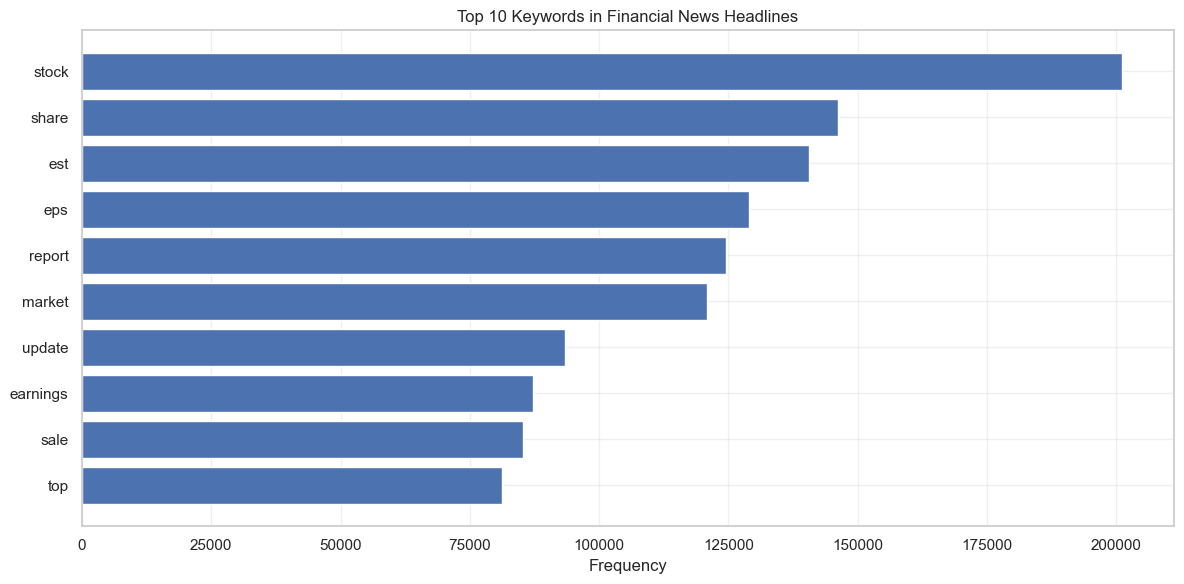

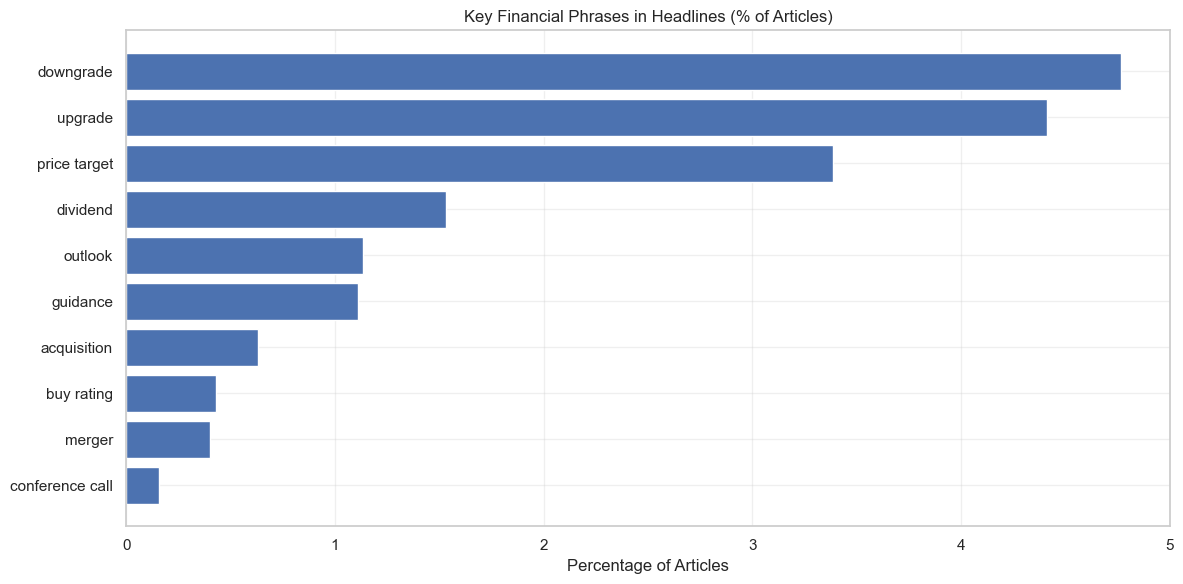

In [ ]:
print("\n===== TEXT ANALYSIS =====")
try:
    nltk.download('punkt', force=True)
    nltk.download('stopwords', force=True)
    nltk.download('wordnet', force=True)
    nltk.download('punkt_tab')
    keywords_df = extract_common_keywords(news_data, n=20)
    print("\nTop 20 Keywords in Headlines:")
    print(keywords_df)

    # Extract common bigrams (two-word phrases)
    print("\nExtracting common bigrams...")
    bigrams_df = extract_keyword_bigrams(news_data, n=15)
    print("\nTop 15 Bigrams (Two-word Phrases) in Headlines:")
    print(bigrams_df)

    # Identify key financial phrases
    print("\nIdentifying key financial phrases...")
    key_phrases_df = identify_key_phrases(news_data)
    print("\nKey Financial Phrases in Headlines:")
    print(key_phrases_df)

    # Plot top keywords
    plt.figure(figsize=(12, 6))
    plt.barh(keywords_df['keyword'][:10], keywords_df['frequency'][:10])
    plt.title('Top 10 Keywords in Financial News Headlines')
    plt.xlabel('Frequency')
    plt.gca().invert_yaxis()  # Display highest frequency at the top
    plt.tight_layout()
    plt.show()

    # Plot key phrases
    plt.figure(figsize=(12, 6))
    plt.barh(key_phrases_df['phrase'][:10], key_phrases_df['percentage'][:10])
    plt.title('Key Financial Phrases in Headlines (% of Articles)')
    plt.xlabel('Percentage of Articles')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in text analysis: {e}")

In [91]:
from src.features.time_series_analysis import (resample_news_frequency, detect_news_spikes,
                                            analyze_intraday_patterns, analyze_news_seasonality)

print("\n===== TIME SERIES ANALYSIS =====")

# Safe date conversion function
def safe_convert_dates(df, date_column='date'):
    """Safely convert dates with explicit error handling"""
    df_copy = df.copy()
    
    # Check the data type
    print(f"Original date column type: {df_copy[date_column].dtype}")
    print(f"Sample date values: {df_copy[date_column].head(3).tolist()}")
    
    try:
        # Try converting with a specific format
        df_copy[date_column] = pd.to_datetime(df_copy[date_column], 
                                            errors='coerce')
        
        # Report on conversion success
        print(f"Date column type after conversion: {df_copy[date_column].dtype}")
        print(f"NaT values after conversion: {df_copy[date_column].isna().sum()}")
        
        # Drop rows with NaT values
        df_copy = df_copy.dropna(subset=[date_column])
        print(f"Rows remaining after filtering NaT dates: {len(df_copy)}")
        
        return df_copy
    except Exception as e:
        print(f"Error converting dates: {e}")
        return None


===== TIME SERIES ANALYSIS =====


Converting dates for time series analysis...
Original date column type: object
Sample date values: ['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00', '2020-05-26 04:30:07-04:00']
Date column type after conversion: datetime64[ns, UTC-04:00]
NaT values after conversion: 1351341
Rows remaining after filtering NaT dates: 55987

Analyzing news publication patterns over time...

Generated daily news frequency for 3334 days


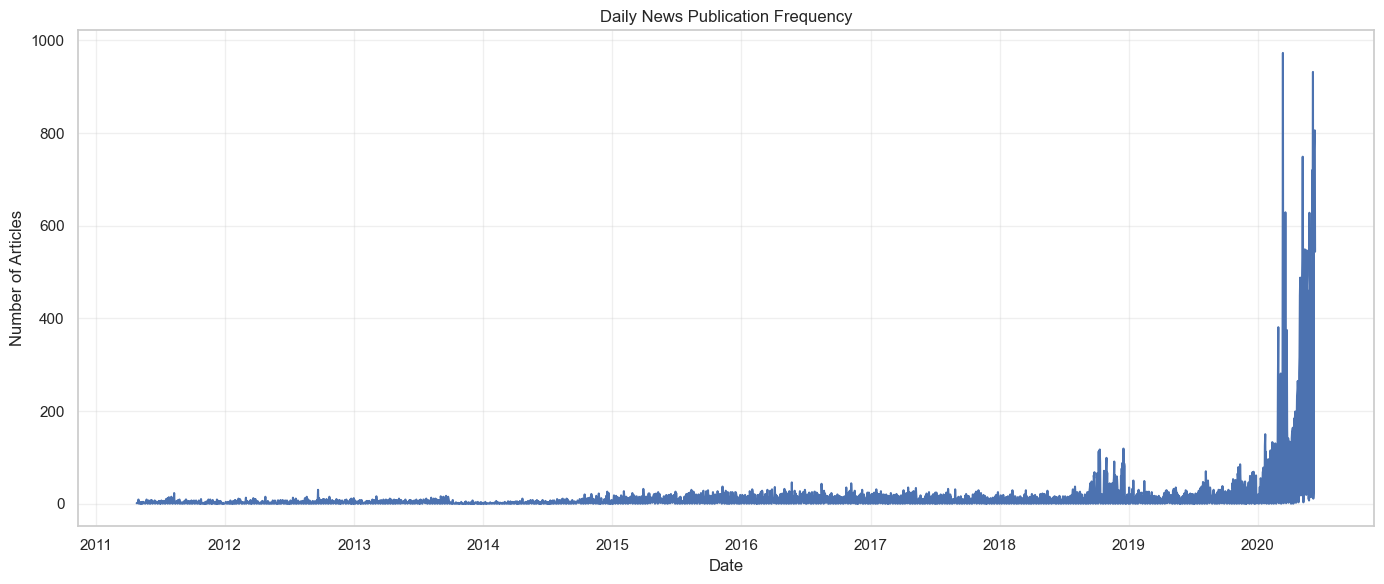


Detected 35 significant spikes in news volume

Top 5 news volume spikes:
                       date  article_count  magnitude
0 2012-09-21 00:00:00-04:00             30   6.569343
1 2012-04-25 00:00:00-04:00             15   6.081081
2 2013-12-02 00:00:00-04:00              7   6.000000
3 2014-04-22 00:00:00-04:00             11   5.892857
4 2020-03-12 00:00:00-04:00            973   5.776766

Hourly news publication pattern:
    hour  article_count  percentage  is_peak
0      0             67    0.119671    False
1      1             14    0.025006    False
2      2             57    0.101809    False
3      3             93    0.166110    False
4      4           1469    2.623823    False
5      5           1829    3.266830    False
6      6           2476    4.422455    False
7      7           5033    8.989587    False
8      8           5527    9.871935    False
9      9           5965   10.654259    False
10    10           7669   13.697823     True
11    11           5701   10

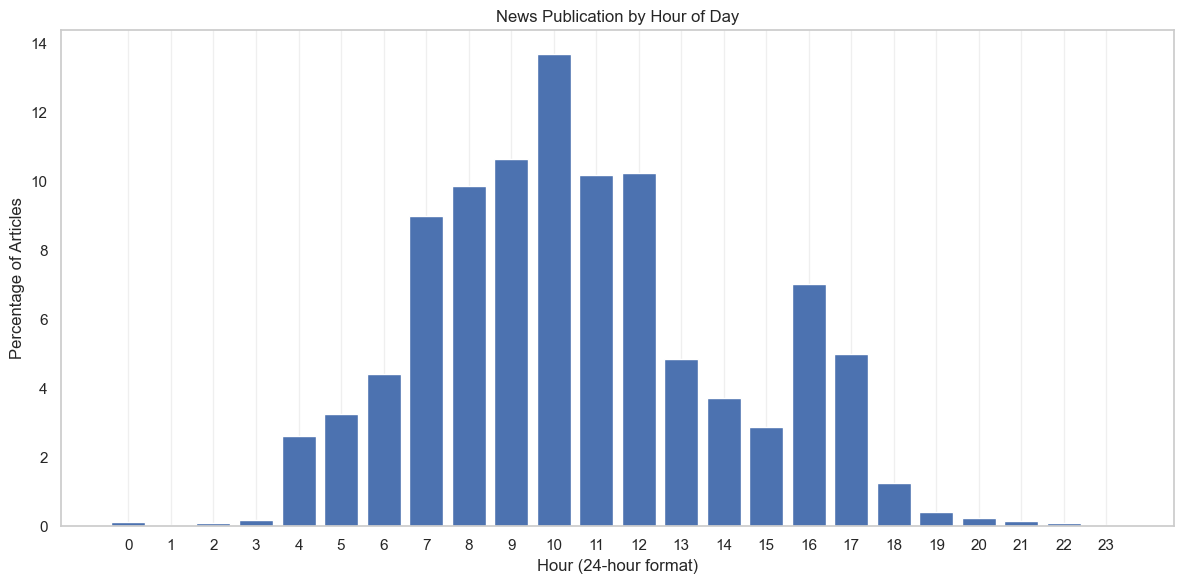

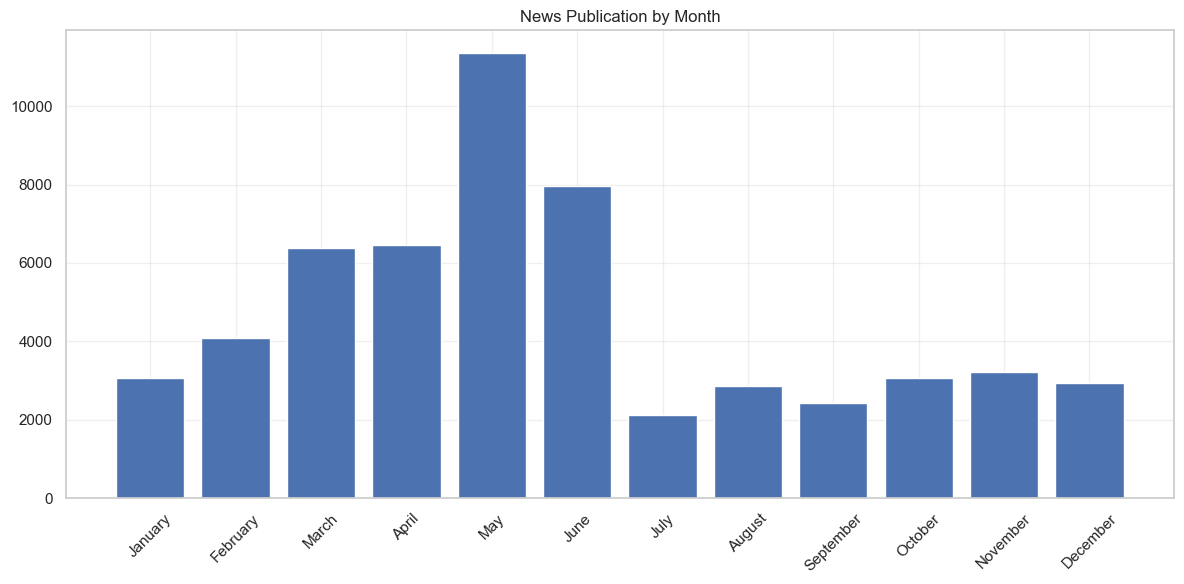

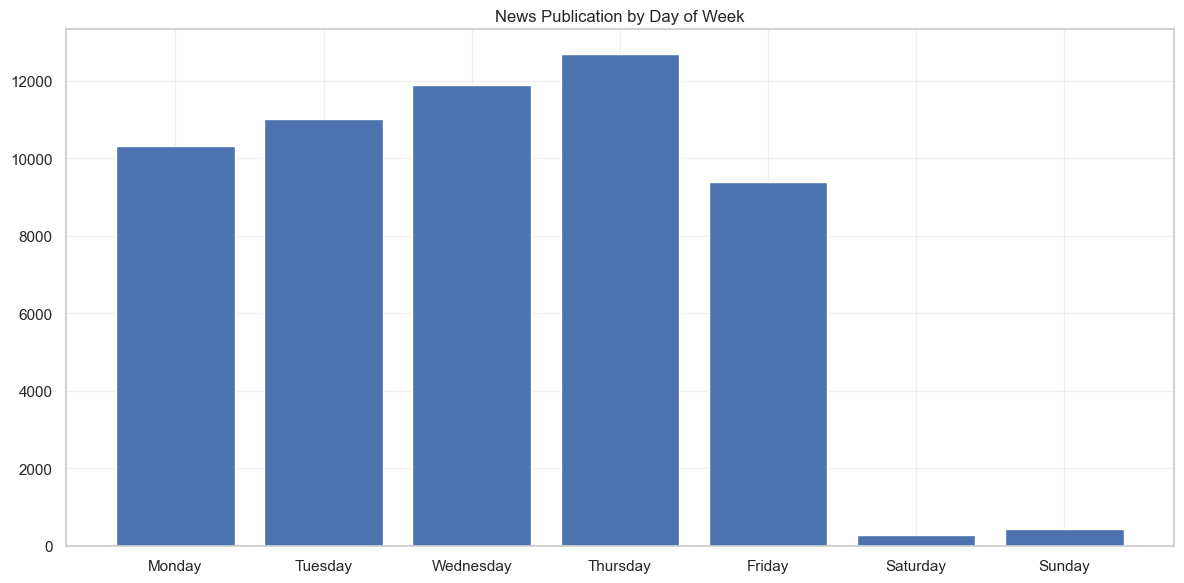

In [92]:
# Try to convert dates for time series analysis
if 'date' in news_data.columns:
    print("Converting dates for time series analysis...")
    news_data_with_dates = safe_convert_dates(news_data)
    
    if news_data_with_dates is not None and len(news_data_with_dates) > 0:
        # Perform time series analysis on news frequency
        print("\nAnalyzing news publication patterns over time...")
        
        try:
            # Resample news frequency by day
            daily_news = resample_news_frequency(news_data_with_dates, freq='D')
            print(f"\nGenerated daily news frequency for {len(daily_news)} days")
            
            # Plot daily news frequency
            plt.figure(figsize=(14, 6))
            plt.plot(daily_news['date'], daily_news['article_count'])
            plt.title('Daily News Publication Frequency')
            plt.xlabel('Date')
            plt.ylabel('Number of Articles')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            
            # Detect spikes in news volume
            news_spikes = detect_news_spikes(news_data_with_dates, threshold=2.5)
            print(f"\nDetected {len(news_spikes)} significant spikes in news volume")
            if len(news_spikes) > 0:
                print("\nTop 5 news volume spikes:")
                print(news_spikes[['date', 'article_count', 'magnitude']].head())
            
            # Analyze intraday patterns
            hourly_pattern = analyze_intraday_patterns(news_data_with_dates)
            print("\nHourly news publication pattern:")
            print(hourly_pattern)
            
            # Plot hourly distribution
            plt.figure(figsize=(12, 6))
            plt.bar(hourly_pattern['hour'], hourly_pattern['percentage'])
            plt.title('News Publication by Hour of Day')
            plt.xlabel('Hour (24-hour format)')
            plt.ylabel('Percentage of Articles')
            plt.xticks(range(0, 24))
            plt.grid(axis='y')
            plt.tight_layout()
            plt.show()
            
            # Analyze seasonal patterns
            seasonal_patterns = analyze_news_seasonality(news_data_with_dates)
            
            # Plot monthly pattern
            monthly = seasonal_patterns['monthly']
            plt.figure(figsize=(12, 6))
            plt.bar(monthly['month_name'], monthly['article_count'])
            plt.title('News Publication by Month')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Plot weekly pattern
            weekly = seasonal_patterns['weekly']
            plt.figure(figsize=(12, 6))
            plt.bar(weekly['day_name'], weekly['article_count'])
            plt.title('News Publication by Day of Week')
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error in time series analysis: {e}")
    else:
        print("Could not perform time series analysis due to date conversion issues")
else:
    print("No date column found for time series analysis")


===== ENHANCED PUBLISHER ANALYSIS =====

Analyzing publisher email domains...

Email domains found in publisher information:
                   domain  count  percentage category
0            benzinga.com   7937    0.563977    Other
1               gmail.com    139    0.009877    Other
2            andyswan.com      5    0.000355    Other
3          investdiva.com      2    0.000142    Other
4           tothetick.com      2    0.000142    Other
5           eosdetroit.io      1    0.000071    Other
6  forextraininggroup.com      1    0.000071    Other
7         stockmetrix.net      1    0.000071    Other


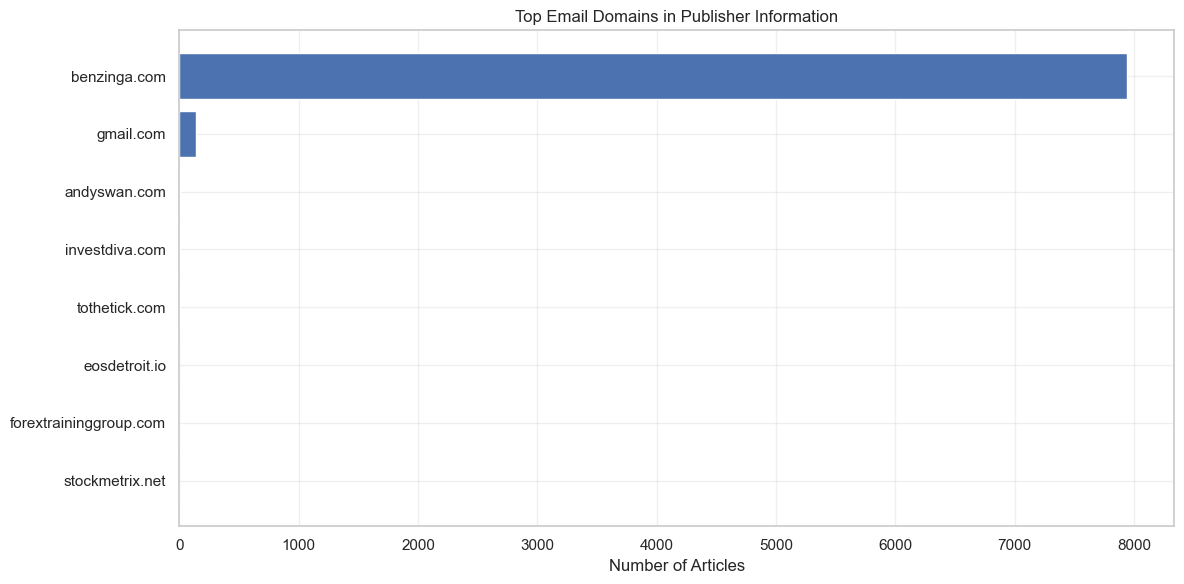

In [93]:
# ===== 3. ENHANCED PUBLISHER ANALYSIS =====

# Import publisher analysis module
from src.features.publisher_detailed_analysis import (extract_email_domains,
                                                   analyze_publisher_focus,
                                                   analyze_publisher_diversity)

print("\n===== ENHANCED PUBLISHER ANALYSIS =====")

# Analyze email domains (if publishers are email addresses)
if 'publisher' in news_data.columns:
    try:
        print("\nAnalyzing publisher email domains...")
        email_domains = extract_email_domains(news_data)
        
        if email_domains is not None and len(email_domains) > 0:
            print("\nEmail domains found in publisher information:")
            print(email_domains.head(10))
            
            # Plot top domains
            plt.figure(figsize=(12, 6))
            plt.barh(email_domains['domain'][:10], email_domains['count'][:10])
            plt.title('Top Email Domains in Publisher Information')
            plt.xlabel('Number of Articles')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
        else:
            print("No email domains found in publisher information")
    except Exception as e:
        print(f"Could not analyze email domains: {e}")


In [94]:
# Analyze publisher focus (which stocks each publisher focuses on)
try:
    print("\nAnalyzing publisher focus...")
    if 'stock' in news_data.columns:
        publisher_focus = analyze_publisher_focus(news_data)
        print(f"\nAnalyzed focus for {len(publisher_focus)} top publishers")     
        # Show details for the top publisher
        if len(publisher_focus) > 0:
            top_publisher = next(iter(publisher_focus))
            print(f"\nFocus details for {top_publisher}:")
            print(f"Total articles: {publisher_focus[top_publisher]['article_count']}")
            print(f"Top stocks covered:")
            print(publisher_focus[top_publisher]['stock_focus'])
            print(f"Top words used:")
            print(publisher_focus[top_publisher]['top_words'])
    else:
        print("No stock column found for publisher focus analysis")
except Exception as e:
    print(f"Error analyzing publisher focus: {e}")


Analyzing publisher focus...

Analyzed focus for 10 top publishers

Focus details for Paul Quintaro:
Total articles: 228373
Top stocks covered:
  stock  count  percentage
0   XRT    571    0.250030
1   AGN    561    0.245651
2   JCP    557    0.243899
3  EBAY    539    0.236017
4    VZ    530    0.232076
Top words used:
      word  count
0       vs  86127
1      est  82583
2        m  82510
3       of  72684
4        q  59303
5      eps  57015
6  reports  55269
7    sales  31402
8        b  24141
9   shares  22817



Analyzing publisher diversity...

Publisher diversity analysis (variety of stocks covered):
           publisher  article_count  unique_stocks  stocks_per_article  \
0       Eddie Staley          57254           4466            0.078003   
1         Lisa Levin         186979           4640            0.024816   
2         Hal Lindon          49047           4474            0.091219   
3      Paul Quintaro         228373           4703            0.020594   
4      Monica Gerson          82380           4012            0.048701   
5         Juan Lopez          28438           2883            0.101378   
6  Benzinga Newsdesk         150484           4049            0.026907   
7      David Johnson           8749           2338            0.267231   
8     Dwight Einhorn          12226           2401            0.196385   
9  luke@benzinga.com           5198           2002            0.385148   

        hhi  diversity_score  
0  0.000444         0.999556  
1  0.000489         0.999511  

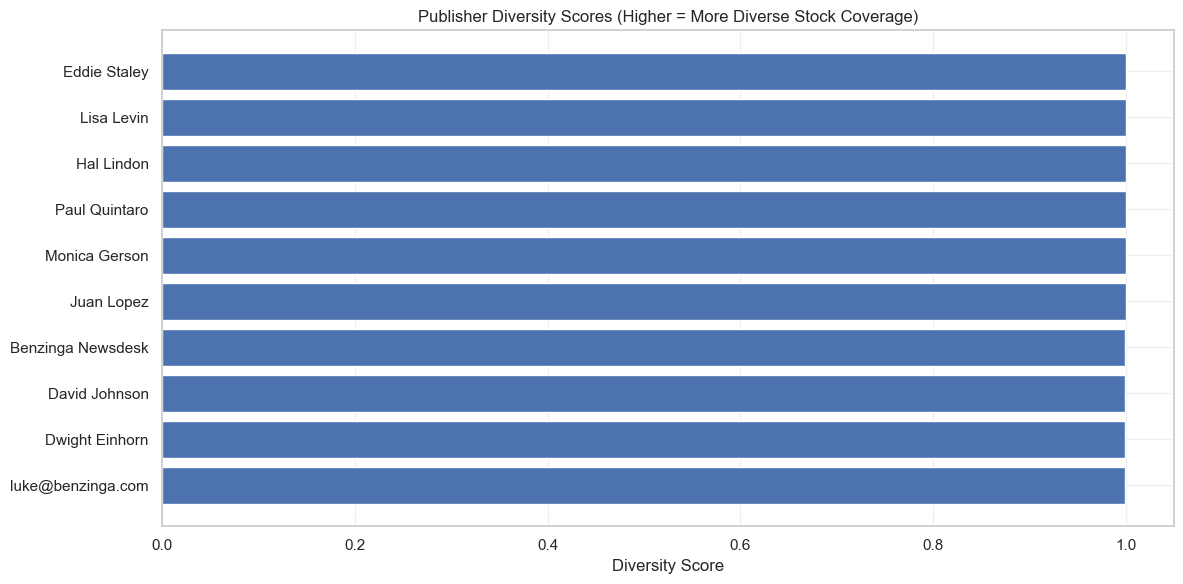

In [95]:
# Analyze publisher diversity
try:
    print("\nAnalyzing publisher diversity...")
    if 'stock' in news_data.columns:
        publisher_diversity = analyze_publisher_diversity(news_data)
        print("\nPublisher diversity analysis (variety of stocks covered):")
        print(publisher_diversity.head(10))
            
        # Plot publisher diversity
        plt.figure(figsize=(12, 6))
        plt.barh(publisher_diversity['publisher'][:10], publisher_diversity['diversity_score'][:10])
        plt.title('Publisher Diversity Scores (Higher = More Diverse Stock Coverage)')
        plt.xlabel('Diversity Score')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    else:
        print("No stock column found for publisher diversity analysis")
except Exception as e:
    print(f"Error analyzing publisher diversity: {e}")

In [96]:
# ===== SUMMARY =====

print("\n===== ANALYSIS SUMMARY =====")
print("1. Text Analysis:")
try:
    print(f"   - Analyzed {len(news_data)} headlines")
    print(f"   - Extracted {len(keywords_df)} top keywords")
    print(f"   - Most common keyword: {keywords_df.iloc[0]['keyword']} (freq: {keywords_df.iloc[0]['frequency']})")
    print(f"   - Most common bigram: {bigrams_df.iloc[0]['bigram']} (freq: {bigrams_df.iloc[0]['frequency']})")
    print(f"   - Most common key phrase: {key_phrases_df.iloc[0]['phrase']} ({key_phrases_df.iloc[0]['percentage']:.2f}%)")
except:
    print("   - Text analysis summary not available")

print("\n2. Time Series Analysis:")
try:
    print(f"   - Analyzed news frequency over {len(daily_news)} days")
    if 'news_spikes' in locals() and len(news_spikes) > 0:
        top_spike_date = news_spikes.iloc[0]['date'].strftime('%Y-%m-%d')
        print(f"   - Highest news spike: {top_spike_date} ({news_spikes.iloc[0]['article_count']} articles)")
    if 'hourly_pattern' in locals():
        peak_hour = hourly_pattern.sort_values('article_count', ascending=False).iloc[0]['hour']
        print(f"   - Peak publication hour: {peak_hour}:00")
    if 'weekly' in locals():
        busiest_day = weekly.sort_values('article_count', ascending=False).iloc[0]['day_name']
        print(f"   - Busiest day of week: {busiest_day}")
except:
    print("   - Time series analysis summary not available")

print("\n3. Publisher Analysis:")
try:
    print(f"   - Analyzed {len(publisher_counts)} unique publishers")
    print(f"   - Top publisher: {publisher_counts.index[0]} ({publisher_counts.iloc[0]} articles)")
    if 'email_domains' in locals() and len(email_domains) > 0:
        print(f"   - Top email domain: {email_domains.iloc[0]['domain']} ({email_domains.iloc[0]['count']} articles)")
    if 'publisher_diversity' in locals() and len(publisher_diversity) > 0:
        most_diverse = publisher_diversity.iloc[0]['publisher']
        most_diverse_score = publisher_diversity.iloc[0]['diversity_score']
        print(f"   - Most diverse publisher: {most_diverse} (diversity score: {most_diverse_score:.3f})")
except:
    print("   - Publisher analysis summary not available")

print("\nCompleted advanced analysis of financial news data")


===== ANALYSIS SUMMARY =====
1. Text Analysis:
   - Analyzed 1407328 headlines
   - Extracted 20 top keywords
   - Most common keyword: stock (freq: 201100)
   - Most common bigram: ake almgren (freq: 3)
   - Most common key phrase: downgrade (4.77%)

2. Time Series Analysis:
   - Analyzed news frequency over 3334 days
   - Highest news spike: 2012-09-21 (30 articles)
   - Peak publication hour: 10:00
   - Busiest day of week: Thursday

3. Publisher Analysis:
   - Analyzed 1034 unique publishers
   - Top publisher: Paul Quintaro (228373 articles)
   - Top email domain: benzinga.com (7937 articles)
   - Most diverse publisher: Eddie Staley (diversity score: 1.000)

Completed advanced analysis of financial news data
